# TC 5033
## Deep Learning
## Fully Connected Deep Neural Networks

#### Activity 1b: Implementing a Fully Connected Network for Kaggle ASL Dataset

- Objective

The aim of this part of the activity is to apply your understanding of Fully Connected Networks by implementing a multilayer network for the [Kaggle ASL (American Sign Language) dataset](https://www.kaggle.com/datasets/grassknoted/asl-alphabet). While you have been provided with a complete solution for a Fully Connected Network using Numpy for the MNIST dataset, you are encouraged to try to come up with the solution.

- Instructions

    This activity requires submission in teams of 3 or 4 members. Submissions from smaller or larger teams will not be accepted unless prior approval has been granted (only due to exceptional circumstances). While teamwork is encouraged, each member is expected to contribute individually to the assignment. The final submission should feature the best arguments and solutions from each team member. Only one person per team needs to submit the completed work, but it is imperative that the names of all team members are listed in a Markdown cell at the very beginning of the notebook (either the first or second cell). Failure to include all team member names will result in the grade being awarded solely to the individual who submitted the assignment, with zero points given to other team members (no exceptions will be made to this rule).

    Load and Preprocess Data: You are provided a starter code to load the data. Be sure to understand the code.

    Review MNIST Notebook (Optional): Before diving into this activity, you have the option to revisit the MNIST example to refresh your understanding of how to build a Fully Connected Network using Numpy.

    Start Fresh: Although you can refer to the MNIST solution at any point, try to implement the network for the ASL dataset on your own. This will reinforce your learning and understanding of the architecture and mathematics involved.

    Implement Forward and Backward Pass: Write the code to perform the forward and backward passes, keeping in mind the specific challenges and characteristics of the ASL dataset.
    
     Design the Network: Create the architecture of the Fully Connected Network tailored for the ASL dataset. Choose the number of hidden layers, neurons, and hyperparameters judiciously.

    Train the Model: Execute the training loop, ensuring to track performance metrics such as loss and accuracy.

    Analyze and Document: Use Markdown cells to document in detail the choices you made in terms of architecture and hyperparameters, you may use figures, equations, etc to aid in your explanations. Include any metrics that help justify these choices and discuss the model's performance.  

- Evaluation Criteria

    - Code Readability and Comments
    - Appropriateness of chosen architecture and hyperparameters for the ASL dataset
    - Performance of the model on the ASL dataset (at least 70% acc)
    - Quality of Markdown documentation

- Submission

Submit this Jupyter Notebook in canvas with your complete solution, ensuring your code is well-commented and includes Markdown cells that explain your design choices, results, and any challenges you encountered.


In [2]:
import numpy as np
import string
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import os
from sklearn.model_selection import train_test_split

%load_ext autoreload
%autoreload 2
#################################
%matplotlib inline


In [5]:
# DATA_PATH = '/media/pepe/DataUbuntu/Databases/asl_data/'
# DATA_PATH = '/home/pepe/Documents/github_repos/datasets/asl_data'
DATA_PATH = './asl_data/'
train_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_train.csv'))
valid_df = pd.read_csv(os.path.join(DATA_PATH, 'sign_mnist_valid.csv'))

In [ ]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [6]:
valid_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,9,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


### Import Images

Extract labels from source dataframes to create y_train and y_val and then remove labels from original dataframes to create x_train and x_val

In [7]:
y_train = np.array(train_df['label'])
y_val = np.array(valid_df['label'])
del train_df['label']
del valid_df['label']
x_train = train_df.values.astype(np.float32)
x_val = valid_df.values.astype(np.float32)

In [8]:
def split_val_test(x, y, pct=0.5, shuffle=True):
    '''
    Create a function that will allow you to split the previously loaded validation set
    into valition and test.
    '''
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=pct,random_state=0,)
    return X_train, y_train, X_test, y_test

In [9]:
x_val, y_val, x_test, y_test = split_val_test(x_val, y_val)

In [13]:
### The following code creates a list with all the letters un the alphabet , exluding j and z

alphabet=list(string.ascii_lowercase)
alphabet.remove('j')
alphabet.remove('z')
print(len(alphabet))

24


### Normalise

In [15]:
def normalise(x_mean, x_std, x_data):
    #function to normalise the inputs
    return (x_data - x_mean) / x_std

In [16]:
x_mean = x_train.mean()
x_std = x_train.std()

x_train = normalise(x_mean, x_std, x_train)
x_val = normalise(x_mean, x_std, x_val)
x_test = normalise(x_mean, x_std, x_test)

In [56]:
x_train.shape

(27455, 784)

Valiate shapes of each observation to check that all images have the same dimension

In [64]:
shape = []
for x in x_train:
  shape.append(x.shape[0])

In [68]:
pd.DataFrame(shape).value_counts()

784    27455
dtype: int64

In [17]:
x_train.mean(), x_train.std()

(3.6268384e-06, 0.99999946)

### Plot samples

In [18]:
def plot_number(image):
    '''
    Create a function that will plot image based on the input numbers
    '''
    plt.figure(figsize=(5,5))
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')
    plt.show()

In [22]:
x_test[rnd_idx].shape

(784,)

Get a random index from the y_test to plot the image we decided to reshape the output of x_test by calculating the square root of the original shape (784) and then plot the image

$$\sqrt{784} = 28 $$


The sample image represents the letter: h


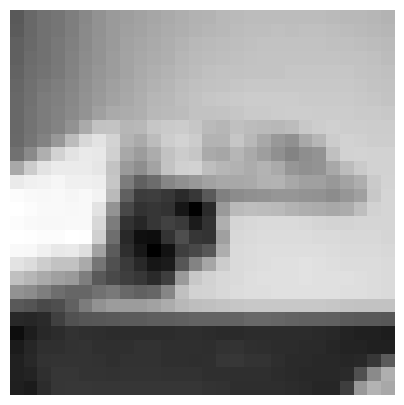

In [50]:
rnd_idx = np.random.randint(len(y_test))
print(f'The sample image represents the letter: {alphabet[y_test[rnd_idx]]}')
img = x_test[rnd_idx].reshape(28,28)
#plt.imshow(img, cmap = 'gray')
plot_number(img)

### Equations for our model


$$z^1 = W^1 X + b^1$$

$$a^1 = ReLU(z^1) $$

$$z^2 = W^2 a^1 + b^2$$

$$\hat{y} = \frac{e^{z^{2_k}}}{\sum_j{e^{z_j}}}$$


$$ \mathcal{L}(\hat{y}^{i}, y^{i}) =  - y^{i}  \ln(\hat{y}^{i}) = -\ln(\hat{y}^i)$$


$$ \mathcal{J}(w, b) =  \frac{1}{num\_samples} \sum_{i=1}^{num\_samples}-\ln(\hat{y}^{i})$$

### Aditional Functions

#### Mini batches

In [42]:
def create_minibatches(mb_size, x, y, shuffle = True):
    '''
    x  #samples, 784
    y #samples, 1
    '''
    assert x.shape[0] == y.shape[0], 'Error in amount of samples'
    total_data = x.shape[0]
    if shuffle:
        idxs = np.arange(total_data)
        np.random.shuffle(idxs)
        x = x[idxs]
        y = y[idxs]
    return ((x[i:i+mb_size], y[i:i+mb_size]) for i in range(0, total_data, mb_size))

## Define our classes for Linear, ReLU y Sequential

In [26]:
class np_tensor(np.ndarray): pass

In [27]:
a = np.array([0, 0])
b = a.view(np_tensor)

In [28]:
type(a)

numpy.ndarray

In [29]:
type(b)

__main__.np_tensor

In [30]:
a == b

np_tensor([ True,  True])

In [34]:
a is b

False

###  Class Linear

In [38]:
class Linear():
    def __init__(self, input_size, output_size):
        '''
        Init parameters using Kaiming He
        '''
        self.W = (np.random.randn(output_size, input_size) / np.sqrt(input_size/2)).view(np_tensor)
        self.b = (np.zeros((output_size, 1))).view(np_tensor)
    def __call__(self, X): # forward of lineal class
        Z = self.W @ X + self.b
        return Z
    def backward(self, X, Z):
        X.grad = self.W.T @ Z.grad
        self.W.grad = Z.grad @ X.T
        self.b.grad = np.sum(Z.grad, axis = 1, keepdims=True)


### Class ReLU

In [36]:
class ReLU():
    def __call__(self, Z):
        return np.maximum(0, Z)
    def backward(self, Z, A):
        Z.grad = A.grad.copy()
        Z.grad[Z <= 0] = 0

### Class Sequential

$$w=w-λ\frac{dj}{dw}$$

$$b=b-λ\frac{dj}{db}$$

In [45]:
class Sequential_layers():
    def __init__(self, layers):
        '''
        layers - List that contains objects of type Linear, ReLU
        '''
        self.layers = layers
        self.x = None
        self.outputs = {}
    def __call__(self, X):
        self.x = X
        self.outputs['l0'] = self.x
        for i, layer in enumerate(self.layers, 1):
            self.x = layer(self.x)
            self.outputs['l'+str(i)]=self.x
        return self.x
    def backward(self):
        for i in reversed(range(len(self.layers))):
            self.layers[i].backward(self.outputs['l'+str(i)], self.outputs['l'+str(i+1)])
    def update(self, learning_rate = 1e-3):
        for layer in self.layers:
            if isinstance(layer, ReLU): continue
            layer.W = layer.W - learning_rate * layer.W.grad
            layer.b = layer.b - learning_rate * layer.b.grad
    def predict(self, X):
        return np.argmax(self.__call__(X))

### Cost Function

$$ ŷ = P(Y=k|Y=Xi)=\frac{e^{s_k}}{\sum_j{e^{s_j}}}$$ SOFTMAX

$$Li=-∑y_jln(ŷ)=ln(\frac{e^{s_j}}{\sum_j{e^{s_j}}})$$ ENTROPY or LOSS FUNCTION

$$J(w, b)=\frac{1}{m}\sum_{i=1}^{m}-ln(\frac{e^{s_j}}{\sum_j{e^{s_j}}})$$ COST FUNCTION

$$\frac{dj}{dw}=\frac{lim}{h->0}\frac{J(w+h)-J(w)}{h}$$ GRADIENT SLOPE

In [44]:
def softmaxXEntropy(x, y):
    batch_size = x.shape[1]
    exp_scores = np.exp(x)
    probs = exp_scores / exp_scores.sum(axis = 0)
    preds = probs.copy()
    # Cost
    #print(f'probs: {probs.shape}')
    #print(f'y.squeeze(): {y.squeeze()}')
    #print(f'np.arange(batch_size): {np.arange(batch_size)}')
    y_hat = probs[y.squeeze(), np.arange(batch_size)]
    cost = np.sum(-np.log(y_hat)) / batch_size
    # Calculate gradients
    probs[y.squeeze(), np.arange(batch_size)] -= 1 #dl/dx
    x.grad = probs.copy()

    return preds, cost

### Training loop

In [40]:
def train(model, epochs, mb_size=128, learning_rate = 1e-3):
    print(np.unique(y_train))
    for epoch in range(epochs):
        for i, (x, y) in enumerate(create_minibatches(mb_size, x_train, y_train)):
            #print(f'i: {i}')
            scores = model(x.T.view(np_tensor))
            _, cost = softmaxXEntropy(scores, y)
            model.backward()
            model.update(learning_rate)
        print(f'cost: {cost}, accuracy: {accuracy(x_val, y_val, mb_size)}')

In [41]:
def accuracy(x, y, mb_size):
    correct = 0
    total = 0
    for i, (x, y) in enumerate(create_minibatches(mb_size, x, y)):
        pred = model(x.T.view(np_tensor))
        correct += np.sum(np.argmax(pred, axis=0) == y.squeeze())
        total += pred.shape[1]
    return correct/total

### Create your model and train it

In [46]:

model = Sequential_layers([Linear(784, 200), 
                           Linear(200, 200), ReLU(),
                           Linear(200, 400), ReLU(), 
                           Linear(400, 200), ReLU(), 
                           Linear(200, 100), ReLU(), 
                           Linear(100, 500), ReLU(), 
                           Linear(100, 50), ReLU(), 
                           Linear(50, 24)])
mb_size = 512
learning_rate = 1e-4
epochs = 20


In [47]:
train(model, epochs, mb_size, learning_rate)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
cost: 1.0514918768727932, accuracy: 0.5223089793641941
cost: 0.573988500008652, accuracy: 0.6539319576129392
cost: 0.34957267269915065, accuracy: 0.7027328499721138
cost: 0.2222478960750294, accuracy: 0.7297824874511991
cost: 0.15240070035145695, accuracy: 0.741494701617401
cost: 0.10532064014829451, accuracy: 0.7479085331846068
cost: 0.08684220137555086, accuracy: 0.752649191299498
cost: 0.07925559957553013, accuracy: 0.7587841606246514
cost: 0.051066968327132506, accuracy: 0.7579475738984941
cost: 0.04432475528156484, accuracy: 0.7621305075292806
cost: 0.03638609073328776, accuracy: 0.7640825432236475
cost: 0.034322797054525025, accuracy: 0.7643614054657
cost: 0.03302472147680845, accuracy: 0.7643614054657
cost: 0.02752098618794355, accuracy: 0.7638036809815951
cost: 0.02212293277033175, accuracy: 0.7640825432236475
cost: 0.021137896439924742, accuracy: 0.7651979921918572
cost: 0.018135055210611175, accuracy: 0

### Test your model on Random data from your test set

In [48]:
print(accuracy(x_test, y_test, mb_size))

0.7612939208031233


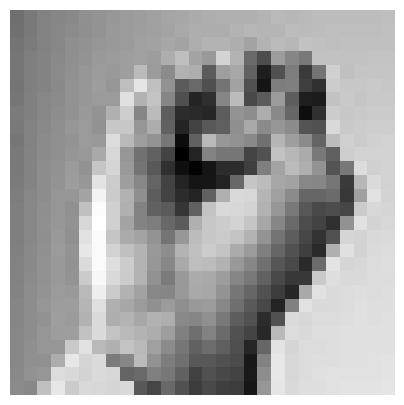

predicted value is: e real value is:e


In [70]:
idx = np.random.randint(len(y_test))
plot_number(x_test[idx].reshape(28,28))
pred = model.predict(x_test[idx].reshape(-1, 1))
print(f'predicted value is: {alphabet[pred]} real value is:{alphabet[y_test[idx]]}')